<a href="https://colab.research.google.com/github/JpChii/ML-Projects/blob/main/09_SkimLit_milestone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Setting up extensions
%load_ext google.colab.data_table

# SkimLit

In this project, we're going to replicate the deep learning model behind the 2017 paper [*PubMed 200k RCT: a Dataset for Sequenctial Sentence Classification in Medical Abstracts*](https://arxiv.org/abs/1710.06071).

When it was release, the paper presented a new dataset called PubMed 200k RCT which consists of ~200,000 labelled RCT abstracts.

The goal of the dataset was to explore the ability for NLP models to classify sentences which appear in sequential order.

In other words, given the abstract of a RCT, what role does each sentence serve in the absrtract?

*Example inputs ([harder to read abstract from PubMed](https://pubmed.ncbi.nlm.nih.gov/28942748/)) and outputs ([easier to read abstract](https://pubmed.ncbi.nlm.nih.gov/32537182/)) of the model we're going to build. The model will take an abstract wall of text and predict the section label each sentence should have.*  

### Model Input

For example, can we train an NLP model which takes the following input (note: the following sample has had all numerical symbols replaced with "@"):

> To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ). A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks. Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers. Pain was assessed using the visual analog pain scale ( @-@ mm ).
Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ).,
Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured.
There was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks. The mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively. Further , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group. These differences remained significant at @ weeks. The Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ). Low-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ).

### Model output

And returns the following output:

```
['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .\n',
 'RESULTS\tThere was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks .\n',
 'RESULTS\tThe mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively .\n',
 'RESULTS\tFurther , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group .\n',
 'RESULTS\tThese differences remained significant at @ weeks .\n',
 'RESULTS\tThe Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ) .\n',
 'CONCLUSIONS\tLow-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ) .\n',
 '\n']
 ```


### Problem in a sentence

The number of RCT papers release is continuing to increase, those without structured abstracts can be hard to read and in turn slow down the researchers moving theough the literature.

### Solution in a sentence

Create an NLP mode to classify abstract sentences into the role they play (e.g. objective, methods, results, etc) to enable researches to skim through the literature.

> Papers to read before code:

1. Where our data is coming from: [*PubMed 200k RCT: a Dataset for Sequential Sentence Classification in Medical Abstracts*](https://arxiv.org/abs/1710.06071)
2. Where our model is coming from: [*Neural networks for joint sentence
classification in medical paper abstracts*](https://arxiv.org/pdf/1612.05251.pdf).

## What is going to be covered(broadly)?

* Downloading the dataset
* Writing a preprocessinf function for our text data
* Setting up multiple modelling experiments with different levels of embeddings
* Building a multinominal model to take in different sources of data
* Replicating the model from above paper
* Finding the most wrong predictions

## Confirm GPU access

In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-01536259-9df5-ec4d-c1bd-f6df29f7139c)


## Get the data

Since we're replicating PubMed 200k paper, let's download the dataset they've used.

The github location of the data is shared in the paper [Data Github](https://github.com/Franck-Dernoncourt/pubmed-rct)

In [3]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 30, done.
remote: Total 30 (delta 0), reused 0 (delta 0), pack-reused 30
Unpacking objects: 100% (30/30), done.


In [4]:
!ls /content/pubmed-rct

PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


Great, as machine learning practionier, it's good to start small and go big. And the authors have done this for us and have created a seperate 20K RCT.

In [5]:
!ls /content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/

dev.txt  test.txt  train.txt


There are three text files,

* train
* test
* dev(val)

The data is already split into train, test, val sets.

In [6]:
# Start our experiments using the 20k dataset with numbers replaced by "@" sign
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [7]:
# Check all the filenames in the target directory
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

The data is really well formatted, but it's still not ready to be passed into the model. Preprocessing will be done after getting one with the data.

## Getting one with the data(visualize examples from dataset)

Let's write a function to read all of the lines of a target text file,

[Checkout the real python document for file realted activities](https://realpython.com/read-write-files-python/)

In [8]:
# Create a function to read the lines of a document
def get_lines(filename):
  """
  Reads a filename (text filename) and returns the lines of text as a list.
  Args:
    filename: a string containing the target filepath
  Returns:
    A lsit of strings with one string per line from target filename
  """

  with open(filename, "r") as f:
    return f.readlines()

In [9]:
# Let's read in the training lines
train_lines = get_lines(data_dir + "train.txt")
train_lines[:30]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

### Preprocessing data

Each document starts with ###uniquenumber and ends with `\n`.

The label and sequence is seperated by `\t`.

The data is read via python but it still needs some preprocessing.

Let's write out how we want the data to look...

```
[{'line_number': 0,
  'target': 'label',
  'text': 'Single Sequence',
  'total_lines': Total Sequences count},....]
```

In [10]:
def preprocess_text_with_line_numbers(filename):
  """
  Return a list of dictionaries of abstract line data.

  Takes in filename, reads it contents and sorts through each line,
  extracting label, sequence, how many sentences are in current abstract.
  """

  # Get all lines into a list
  input_lines = get_lines(filename)
  # Create an empty abstract
  abstract_lines = ""
  # Create an empty list of abstracts
  abstract_samples = []

  # Loop through each line in the target file
  for line in input_lines:

    # Check if the line is ID line
    if line.startswith("###"):
      abstract_id = line
      abstract_lines = "" # reset the abstract string ig the line is an ID line
    elif line.isspace(): # Check to see if line is a new line
      abstract_line_split = abstract_lines.splitlines() # split abstract into seperate lines

      # Iterate through each line in a single abstracr and count them at the same line
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {} # Create empty dictionary for each line
        target_text_split = abstract_line.split("\t") # Split target label from text
        line_data["target"] = target_text_split[0]
        line_data["text"] = target_text_split[1].lower() # Get target text and lower it
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"] = len(abstract_line_split) -1
        abstract_samples.append(line_data) 

    else: # If the above conditions aren't fullfilled, the line contains a labelled sentence
      abstract_lines += line

  return abstract_samples

In [11]:
%%time
train_samples = preprocess_text_with_line_numbers(data_dir+"train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir+"dev.txt")
test_samples = preprocess_text_with_line_numbers(data_dir+"test.txt")

CPU times: user 423 ms, sys: 96.3 ms, total: 519 ms
Wall time: 513 ms


In [12]:
train_samples[:12]

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'total_lines': 11},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 11},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 11},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 11},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'secondary outcome measures include

In [13]:
len(train_samples), len(val_samples), len(test_samples)

(180040, 30212, 30135)

Uncomment and run the below cell to understand the preprocessing function better.

In [14]:
# # Get all lines into a list
# input_lines = get_lines(data_dir + "train.txt")
# # Create an empty abstract
# abstract_lines = ""
# # Create an empty list of abstracts
# abstract_samples = []

#   # Loop through each line in the target file
# for line in input_lines:

#     print(f"line: {line}")

#     # Check if the line is ID line
#     if line.startswith("###"):
#       abstract_id = line
#       print(f"Id: {abstract_id}")
#       abstract_lines = "" # reset the abstract string ig the line is an ID line
#     elif line.isspace(): # Check to see if line is a new line
#       print(f"Line after isspace check: {line}")
#       print(line.isspace())
#       abstract_line_split = abstract_lines.splitlines() # split abstract into seperate lines
#       print(f"abstract_line_split: {abstract_line_split}")
#       # Iterate through each line in a single abstracr and count them at the same line
#       for abstract_line_number, abstract_line in enumerate(abstract_line_split):
#         print(f"abstract_line_number: {abstract_line_number}, abstract_line: {abstract_line}")
#         line_data = {} # Create empty dictionary for each line
#         target_text_split = abstract_line.split("\t") # Split target label from text
#         line_data["target"] = target_text_split[0]
#         line_data["text"] = target_text_split[1].lower() # Get target text and lower it
#         line_data["line_number"] = abstract_line_number
#         line_data["total_lines"] = len(abstract_line_split) -1
#         abstract_samples.append(line_data) 

#     else: # If the above conditions aren't fullfilled, the line contains a labelled sentence
#       abstract_lines += line
#       print(f"Else condition abstract_lines: {abstract_lines}")

#     if line == "\n":
#       break

### Visualizing preprocessed data

Now the data is in the format of a list of dictionaries, how about we turn into a datafram to further visualizing the data.

In [15]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

train_df[:50]

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [16]:
# Distribution of labels in training data
label_dist = pd.DataFrame(train_df.target.value_counts()).reset_index()
label_dist

,index,target
0,METHODS,59353
1,RESULTS,57953
2,CONCLUSIONS,27168
3,BACKGROUND,21727
4,OBJECTIVE,13839


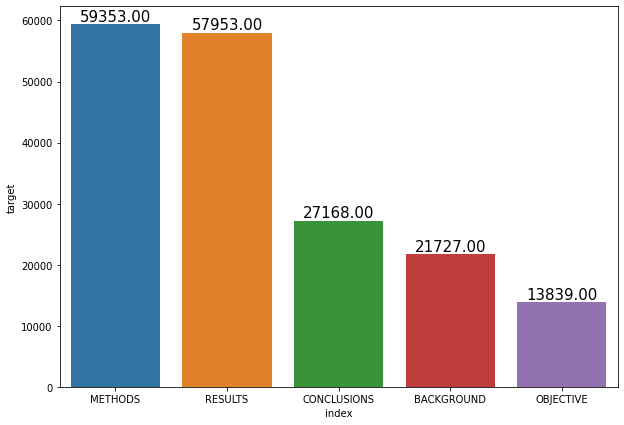

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
plot = sns.barplot(x="index", y="target", data=label_dist)

# Iterating over bars one by one
for bar in plot.patches:
  plot.annotate(format(bar.get_height(), '.2f'), # gets the value
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), # point in the plot fot text
                ha='center',
                va='center',
                size=15,
                xytext=(0,8),
                textcoords='offset points')
  
plt.show()

There is a little imbalance between `objective` and `method` but it's not big like 10x or 100x.

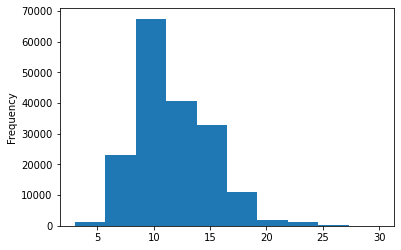

In [18]:
# Let's check the length of different lines
train_df.total_lines.plot.hist()

### Get list of sentences

In [19]:
# Convert abstract text lines into lists
train_sentences = train_df.text.to_list()
val_sentences = val_df.text.to_list()
test_sentences = test_df.text.to_list()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [20]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

## Turning our target labels into numbers

### One-Hot encode

In [21]:
# One-hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_encoder.transform(val_df['target'].to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot_encoder.transform(test_df['target'].to_numpy().reshape(-1,1))

In one-hot encoded labels the lables are sorted in alphabetical order and encoded.

### Label encode labels

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [23]:
train_labels_encoded = label_encoder.fit_transform(train_df['target'].to_numpy())
val_labels_encoded = label_encoder.transform(val_df['target'].to_numpy())
test_labels_encoded = label_encoder.transform(test_df['target'].to_numpy())
train_labels_encoded[:5]

array([3, 2, 2, 2, 2])

In [24]:
# Get class names and number of classes using one hot encoder
print(one_hot_encoder.categories_)
# Get class names and number of classes using label encoder
print(label_encoder.classes_)

[array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)]
['BACKGROUND' 'CONCLUSIONS' 'METHODS' 'OBJECTIVE' 'RESULTS']


In [25]:
# Store the classes
class_names = label_encoder.classes_
print(class_names)

['BACKGROUND' 'CONCLUSIONS' 'METHODS' 'OBJECTIVE' 'RESULTS']


Now er're ready for modelling experiments, let's list them down.

## Model Experimentaion

* Model 0: Naive Bayes with TF-IDF encoder(baseline)
* Model 1: Conv 1D with Token embeddings
* model 2: TensorFlow Hub Pretrained Feature extractor
* model 3: Conv1D with character embeddings
* mode 4: Pretrained token embedding (same as 2) + character embeddings (same as 3)
* model 5: Pretrained token embeddings + character embeddings + positional embeddings

### Model 0: Baseline - Naive Bayes with TF-IDF encoder

In [26]:
# Importing
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [27]:
# Building the model
model0 = Pipeline([("tfidf", TfidfVectorizer()), # Converts word to numbers using tfidf
                 ("clf", MultinomialNB())]) # Model the text

# Fit the data
model0.fit(train_sentences,
           train_labels_encoded)
# One hot encoded labels are not working with input shape error

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [28]:
# Evaluating the model
model0.score(val_sentences,
             val_labels_encoded)

0.7218323844829869

Getting the helper function

In [29]:
!wget https://raw.githubusercontent.com/JpChii/ML-Tools/main/dl_helper.py

--2021-06-07 10:37:16--  https://raw.githubusercontent.com/JpChii/ML-Tools/main/dl_helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17973 (18K) [text/plain]
Saving to: ‘dl_helper.py’

dl_helper.py        100%[===================>]  17.55K  --.-KB/s    in 0s      

2021-06-07 10:37:16 (124 MB/s) - ‘dl_helper.py’ saved [17973/17973]



In [30]:
from dl_helper import calculate_results, plot_loss_curves

In [31]:
preds_model0 = model0.predict(val_sentences)

In [32]:
preds_model0[:5], val_labels_encoded[:5]

(array([4, 1, 3, 2, 2]), array([0, 0, 3, 2, 2]))

In [33]:
# Caluclate metrics
results_baseline = calculate_results(y_true=val_labels_encoded,
                                     y_pred=preds_model0)
results_baseline

{'accuracy': 0.7218323844829869,
 'f1': 0.6989250353450294,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869}

Let's create a dataframe to store the baseline reulst and future results.

In [34]:
results_df = pd.DataFrame({"baseline": results_baseline})
results_df.T

,accuracy,f1,precision,recall
baseline,0.721832,0.698925,0.718647,0.721832


## Preparing our data for deep sequence models

Before we start deeper models, we've to create vectorization embedding layers.

In [35]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [36]:
# How long is each sentence in average?
sent_lens = [len(sentence.split()) for sentence in train_sentences]
average_sent_len = np.mean(sent_lens)
average_sent_len

26.338269273494777

Why this length is importatn, tensorflow likes all it's input to be in the same shape. So what we might do is fit all the sentences to the average sentence length.

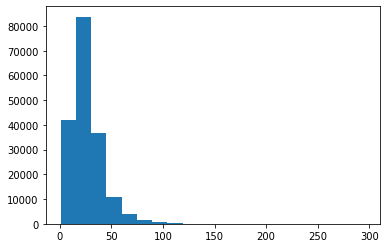

In [37]:
# What's distribution look like
plt.hist(sent_lens, bins=20);

In [38]:
# How long of a sentence lenght covers 95% examples?
output_seq_len = int(np.percentile(sent_lens,95))
output_seq_len

55

So what above `np.percentile` does is let us knowthe length of `95%` of sequences in `train_sentences`.

So we already know the data has to be in fixed shape but using too small size, we might lose valuable information. Using too large size we might have lot's of `0's` in our data.

In [39]:
# What's the maximum length in training set?
max(sent_lens)

296

Okay now, we've the ouput sequence length.let's setup  text vectorizer.

### Text Vectorizer

Convert words to numbers using `TextVectorization layer`

In [40]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [41]:
# The vocabulary size for 20k pubmed dataset in paper is 68k
# We'll use this vocab size for our text vectorization layer
vocab=68000 # How many words from our dataset, we want our text vectoriztion layer to convert to number

text_vectorizer = TextVectorization(max_tokens=vocab,
                                    output_sequence_length=output_seq_len) # Desired output lenght of vectorized sequences
# We'll leave the remaining in defaults

In [42]:
%%time
# Adapt the vectorizer to dataset
text_vectorizer.adapt(train_sentences)

CPU times: user 42.7 s, sys: 283 ms, total: 42.9 s
Wall time: 42.9 s


In [43]:
# How many words in our training vocabulary?
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary: {len(rct_20k_text_vocab)}"), 
print(f"Most common words in the vocabulary: {rct_20k_text_vocab[:5]}")
print(f"Least common words in the vocabulary: {rct_20k_text_vocab[-5:]}")

Number of words in vocabulary: 64841
Most common words in the vocabulary: ['', '[UNK]', 'the', 'and', 'of']
Least common words in the vocabulary: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [44]:
# Get the config of our text vectorizer
text_vectorizer.get_config()

{'dtype': 'string',
 'max_tokens': 68000,
 'name': 'text_vectorization',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'split': 'whitespace',
 'standardize': 'lower_and_strip_punctuation',
 'trainable': True,
 'vocabulary_size': 64841}

### Create Embedding

In [45]:
# Create token embedding layer
embedding = layers.Embedding(input_dim=len(rct_20k_text_vocab), # length of vocabulary
                               output_dim=128, # Note: different embedding sizes result in drastically different numbers of parameters to train
                               # Use masking to handle variable sequence lengths (save space)
                               mask_zero=True,
                               name="embedding_layer") 

import random
target_sentence = random.choice(train_sentences)
# Show example embedding
print(f"Sentence before vectorization:\n{target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n{vectorized_sentence}\n")
embedded_sentence = embedding(vectorized_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
the proportion of patients gaining @ letters was @ % versus @ % ( p < @ ) at week @ , @ % versus @ % ( p < @ ) at week @ , and @ % versus @ % ( p < @ ) at week @ in the iai @q@ + prn and sham + iai prn groups , respectively .

Sentence after vectorization (before embedding):
[[   2  443    4   12 8450 2510   10  110   14   15   89  110   14   15
    89    3  110   14   15   89    5    2 7207 2204 3682    3  786 7207
  3682   24   83    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]

Sentence after embedding:
[[[ 0.00686603  0.0420067   0.01229328 ... -0.00265133 -0.02319591
   -0.04996933]
  [-0.00762014  0.03626512  0.0352466  ... -0.0399223  -0.00083752
    0.04803742]
  [ 0.02255125 -0.00012701  0.00787784 ...  0.02993418  0.01515373
   -0.04274318]
  ...
  [-0.02137583  0.00947616  0.03900475 ...  0.04581556 -0.04143285
    0.03092756]
  [-0.02137583  0.00947616  0.03900475 ... 

### Speed up the loading of data using `tf.data` API

In [46]:
# Turn our data into TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))
train_dataset

<TensorSliceDataset shapes: ((), (5,)), types: (tf.string, tf.float64)>

In [47]:
# Take the TensorSliceDataset's and turn them into prefetched batches
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>

### Model 1: Conv1D with token embeddings

In [48]:
# Building the model
inputs = layers.Input(shape=(1,), dtype=tf.string)
vectors = text_vectorizer(inputs)
embeds = embedding(vectors)
# x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(embeds)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(embeds)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(5, activation="softmax")(x)

model1 = tf.keras.Model(inputs, outputs)

In [49]:
# Compile the model
model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [50]:
# Checkout the model
model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 55)                0         
_________________________________________________________________
embedding_layer (Embedding)  (None, 55, 128)           8299648   
_________________________________________________________________
conv1d (Conv1D)              (None, 55, 64)            41024     
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 325       
Total params: 8,340,997
Trainable params: 8,340,997
Non-trainable params: 0
___________________________________________________

> **Note:** As ML practioniers, we've to reduce our initial experimentation time as much as possible to find out what is not working quicky. In line with this we're using only 10% of 20k dataset during training. One disadvantage is model will not see the entire data. But this is the tradeoff

In [51]:
# Fit the model
history1 = model1.fit(train_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)), # only fit on 10% of batches for faster training time
                              epochs=3,
                              validation_data=val_dataset,
                              validation_steps=int(0.1 * len(val_dataset))) # only validate on 10% of batches

Epoch 1/3
562/562 [==============================] - 74s 76ms/step - loss: 0.9091 - accuracy: 0.6400 - val_loss: 0.6835 - val_accuracy: 0.7364
Epoch 2/3
562/562 [==============================] - 43s 76ms/step - loss: 0.6606 - accuracy: 0.7546 - val_loss: 0.6387 - val_accuracy: 0.7706
Epoch 3/3
562/562 [==============================] - 43s 76ms/step - loss: 0.6194 - accuracy: 0.7722 - val_loss: 0.5979 - val_accuracy: 0.7869


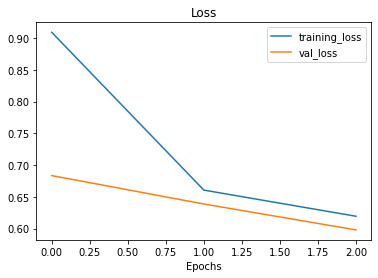

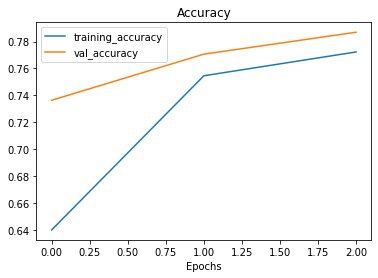

In [52]:
# LEt's checkout the loss curve
plot_loss_curves(history1)

Okay the loss curves look good, validation curve is closley folloeing the training curve. Let's calculate some metrics.

In [53]:
# Make predictions
pred_probs_model1 = model1.predict(val_dataset)
preds_model1 = tf.argmax(tf.squeeze(tf.round(pred_probs_model1)), axis=1).numpy()
preds_model1[:5]

array([0, 0, 3, 2, 4])

In [54]:
from dl_helper import calculate_results
results_model1 = calculate_results(y_true=val_labels_encoded,
                                   y_pred=preds_model1)
results_model1

{'accuracy': 0.7574142724745134,
 'f1': 0.7665896232581451,
 'precision': 0.7897339787380335,
 'recall': 0.7574142724745134}

In [55]:
# add the results to dataframe
results_df["model1_conv1d"] = results_model1.values()
results_df.T

,accuracy,f1,precision,recall
baseline,0.721832,0.698925,0.718647,0.721832
model1_conv1d,0.757414,0.789734,0.757414,0.766590


### Model 2: TensorFlow Hub Pretrained Extrctor

In the paper, model is intialized with glove embedding pretrained on wikipedia and gigaword. 

The above pretrained embedding is not available in tensorflow hub, so we're going to use [Universal Sentence Encoder](https://www.aclweb.org/anthology/D18-2029.pdf) from [TensorFlowHub](https://tfhub.dev/google/universal-sentence-encoder/4).

We can get other NLP models from [HuggingFace.co](https://huggingface.co/models)

In [56]:
import tensorflow_hub as hub

In [57]:
# Loading in the embedding
universal_sentence_encoder = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                             trainable=False,
                                             input_shape=[],
                                             dtype=tf.string,
                                             name="USE")

In [58]:
embedding_sentence = universal_sentence_encoder([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"])
print(f"USE embedding output shape: {embedding_sentence.shape}")

USE embedding output shape: (2, 512)


In [59]:
# Building the model
model2 = tf.keras.Sequential([
    universal_sentence_encoder,
    layers.Dense(128, activation="relu"),
    layers.Dense(5, activation="softmax")
])

# Compile the model
model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [60]:
# Checkout the summary
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


The number parameters is highest at sequence encoder. But we're keeping the pretrained embeddings for this experiment.

In [61]:
# Fit the model
history2 = model2.fit(train_dataset,
                      steps_per_epoch=int(0.1 * len(train_dataset)),
                      epochs=3,
                      validation_data=val_dataset,
                      validation_steps=int(0.1 * len(val_dataset)))

Epoch 1/3
562/562 [==============================] - 8s 11ms/step - loss: 0.9137 - accuracy: 0.6506 - val_loss: 0.7950 - val_accuracy: 0.6888
Epoch 2/3
562/562 [==============================] - 6s 11ms/step - loss: 0.7681 - accuracy: 0.7011 - val_loss: 0.7540 - val_accuracy: 0.7028
Epoch 3/3
562/562 [==============================] - 6s 11ms/step - loss: 0.7511 - accuracy: 0.7117 - val_loss: 0.7395 - val_accuracy: 0.7148


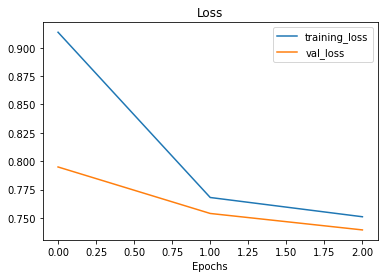

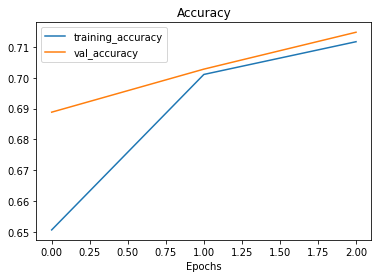

In [62]:
# Checkout the loss curves
plot_loss_curves(history2)

Looks like the validation accuracy cruve is starting to dip a little.

Let's calculate the metrics.

In [63]:
# Make predictions
pred_probs_model2 = model2.predict(val_dataset)
# Convert pred probs to preds
preds_model2 = tf.argmax(pred_probs_model2, axis=1)
preds_model2[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 1, 3, 2, 4])>

In [64]:
# Calculate metrics
results_model2 = calculate_results(y_true=val_labels_encoded,
                                   y_pred=preds_model2)
results_model2

{'accuracy': 0.7140209188401959,
 'f1': 0.7111600737912002,
 'precision': 0.7152861936728832,
 'recall': 0.7140209188401959}

In [65]:
# Add the result to results dataframe
results_df["model2_use"] = results_model2.values()
results_df.T

,accuracy,f1,precision,recall
baseline,0.721832,0.698925,0.718647,0.721832
model1_conv1d,0.757414,0.789734,0.757414,0.766590
model2_use,0.714021,0.715286,0.714021,0.711160


The performance of this model is less than the performance of our model 2.

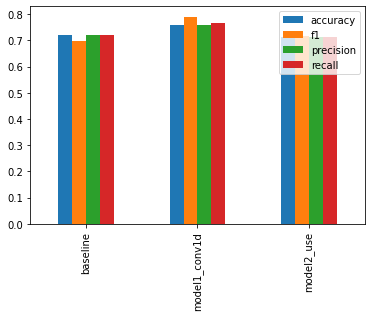

In [66]:
results_df.T.plot(kind="bar")

### Model 3: Conv1D with character embeddings

The paper we're replicating used a combination of token and character-level embeddings.

Previously we've token level embeddings but we'll need to similar steps for characters if we want to use character-level embeddings.

#### Creating a character-level tokenizer

In [67]:
train_sentences[:5]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']

In [68]:
# Make function to split sentences into characters
def split_chars(text):
  return " ".join(list(text))

In [69]:
" ".join(list(train_sentences[0]))

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [70]:
# Text splitting non-character-level sequence into characters
split_chars(train_sentences[0])

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [71]:
# Split sequence-level data splits into character-level data splits
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
train_chars[:5]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [72]:
# what's the average character length
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

(array([1.41175e+05, 3.71110e+04, 1.60000e+03, 1.27000e+02, 2.10000e+01,
        5.00000e+00, 1.00000e+00]),
 array([1.00000000e+00, 1.98857143e+02, 3.96714286e+02, 5.94571429e+02,
        7.92428571e+02, 9.90285714e+02, 1.18814286e+03, 1.38600000e+03]),
 <a list of 7 Patch objects>)

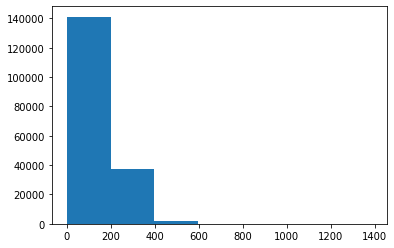

In [73]:
# Checkthe distribution of sequence at charcter level
plt.hist(char_lens, bins=7)

In [74]:
# What character length covers 95% of sequences
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

In [75]:
# Get all keyboard characters
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [76]:
# Create char-level token ectorizer instance
NUM_CHAR_TOKENS = len(alphabet) + 2 # add for space and OOV token (OOV = out of vocab)
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                    output_sequence_length=output_seq_char_len,
                                    # standardize=None, Use this if you want punctuation in your vocab
                                    name="char_vectorizer")

In [77]:
# ADapt character vectorizer to training characters
char_vectorizer.adapt(train_chars)

In [78]:
# Check character vocab stats
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"Top characters: {char_vocab[:5]}")
print(f"Bottom characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 28
Top characters: ['', '[UNK]', 'e', 't', 'i']
Bottom characters: ['k', 'x', 'z', 'q', 'j']


In [79]:
# Check character vocab stats with punctuation
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"Top characters: {char_vocab[:5]}")
print(f"Bottom characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 28
Top characters: ['', '[UNK]', 'e', 't', 'i']
Bottom characters: ['k', 'x', 'z', 'q', 'j']


In [80]:
# Test out our character vectorizer
target_char = random.choice(train_chars)
char_token = char_vectorizer([target_char])
print(f"target character: {target_char}")
print(f"target character length: {len(target_char)}")
print(f"target character token: {char_token}")
print(f"Length of character token: {len(char_token[0])}")
print(f"Shape of character token: {char_token.shape}")

target character: r o m a r k   l a b o r a t o r i e s   l c   .
target character length: 47
target character token: [[ 8  7 15  5  8 23 12  5 22  7  8  5  3  7  8  4  2  9 12 11  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

#### Creating  a character-level embdedding

In [81]:
embedding_char = tf.keras.layers.Embedding(input_dim=len(char_vocab), # number of diffetent characters
                                           output_dim=25, # Size of char embeding from paper
                                           mask_zero=True,
                                           name="char_embedding_layer")

In [82]:
# Test our embedding layer
target_char = random.choice(train_chars)
char_token = char_vectorizer([target_char])
char_embed = embedding_char(char_token)
print(f"target character: {target_char}")
print(f"target character length: {len(target_char)}")
print(f"target character token: {char_token}")
print(f"Length of character token: {len(char_token[0])}")
print(f"Shape of character token: {char_token.shape}")

print(f"target embed character: {char_embed}")
print(f"Length of embed character: {len(char_embed[0])}")
print(f"Shape of embed character token: {char_embed.shape}")

target character: t h e   c u m u l a t i v e   p r o p o r t i o n   o f   t h r o m b o s i s - f r e e   i n d i v i d u a l s   w a s   l o w e r   i n   p a t i e n t s   w h o s e   g a p s s   w a s   i n c r e a s e d   b y   @   o r   m o r e   p o i n t s   (   p   =   @   )   .
target character length: 271
target character token: [[ 3 13  2 11 16 15 16 12  5  3  4 21  2 14  8  7 14  7  8  3  4  7  6  7
  17  3 13  8  7 15 22  7  9  4  9 17  8  2  2  4  6 10  4 21  4 10 16  5
  12  9 20  5  9 12  7 20  2  8  4  6 14  5  3  4  2  6  3  9 20 13  7  9
   2 18  5 14  9  9 20  5  9  4  6 11  8  2  5  9  2 10 22 19  7  8 15  7
   8  2 14  7  4  6  3  9 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

Character level embedding layers are ready now,let's build the model.

#### Building model

In [83]:
# Build model
inputs = layers.Input(shape=(1,), dtype=tf.string)
char_tokens = char_vectorizer(inputs)
char_embeds = embedding_char(char_tokens)
x = layers.Conv1D(filters=64,
                  kernel_size=5,
                  padding="same",
                  activation="relu")(char_embeds)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv1D(filters=64,
                  kernel_size=5,
                  padding="same",
                  activation="relu")(char_embeds)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(5, activation="softmax")(x)
model3 = tf.keras.Model(inputs, outputs)

In [84]:
# Compile the model
model3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [85]:
# Checkout the mode summary
model3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
char_vectorizer (TextVectori (None, 290)               0         
_________________________________________________________________
char_embedding_layer (Embedd (None, 290, 25)           700       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 290, 64)           8064      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325 

In [86]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars,train_labels_one_hot))
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot))
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)) 

In [87]:
# Stting up fast loadig of character level data
train_char_dataset = train_char_dataset.batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
val_char_dataset = val_char_dataset.batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
test_char_dataset = test_char_dataset.batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

Character level embedding model has drastically less parameters compared to the other model, because the vocab size of word level tokenization was big and embeddig output size was 128.

In [88]:
# Fit the model
history3 = model3.fit(train_char_dataset,
                      epochs=3,
                      steps_per_epoch=int(0.1 * len(train_char_dataset)),
                      validation_data=val_char_dataset,
                      validation_steps=int(0.1 * len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 4s 6ms/step - loss: 1.3864 - accuracy: 0.4093 - val_loss: 1.2023 - val_accuracy: 0.5100
Epoch 2/3
562/562 [==============================] - 3s 6ms/step - loss: 1.1805 - accuracy: 0.5175 - val_loss: 1.0394 - val_accuracy: 0.5984
Epoch 3/3
562/562 [==============================] - 3s 6ms/step - loss: 1.0810 - accuracy: 0.5669 - val_loss: 0.9609 - val_accuracy: 0.6406


In [89]:
# Get prediction probabalities
pred_probs_model3 = model3.predict(val_char_dataset)
# Get predictions
preds_model3 = tf.argmax(pred_probs_model3, axis=1)
preds_model3[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([1, 1, 1, 2, 2])>

In [90]:
# Calculate metrics
results_model3 = calculate_results(y_true=val_labels_encoded,
                                   y_pred=preds_model3)
results_model3

{'accuracy': 0.6384218191447107,
 'f1': 0.6255510123351958,
 'precision': 0.6394079249745033,
 'recall': 0.6384218191447107}

In [91]:
# Add this to results df
results_df["model3_conv_with_char_embed"] = results_model3.values()
results_df.T

,accuracy,f1,precision,recall
baseline,0.721832,0.698925,0.718647,0.721832
model1_conv1d,0.757414,0.789734,0.757414,0.766590
model2_use,0.714021,0.715286,0.714021,0.711160
model3_conv_with_char_embed,0.638422,0.639408,0.638422,0.625551


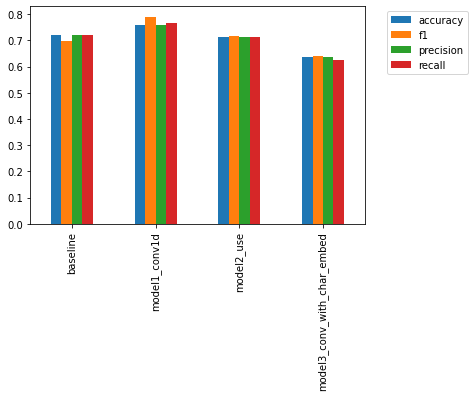

In [92]:
results_df.T.plot(kind="bar").legend(bbox_to_anchor=(1.05, 1))

### Model 4: Pretrained token embedding plus character embeddings(hybrid embedding layer)


1. Create a token-level embedding model(similar to `model_1`)
2. Create a character-level model(similar to `model_3` with a slight modification)
3. Combine 1 & 2 with a concatenate (`layers.concatenate`)
4. build output layers on top of 3 similar to figure 1 and section 4.2 of the [paper](https://arxiv.org/pdf/1612.05251.pdf)
5. Cosntruct a model which takes token and character-level sequences as inputs and produces sequence level probabalities as outputs

#### 4.1 Token level embeddding model

In [93]:
# Checkout the existing model summary
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [97]:
# We can clone the model2, pretrained weights will be retained and the weights of other layers will be resetted
# But let's rewrite it for practice
# Create another instance of universal sentence encoder from thub
universal_sentence_encoder_41 = hub.KerasLayer(handle="https://tfhub.dev/google/universal-sentence-encoder/4",
                                               trainable=False,
                                               input_shape=[],
                                               dtype=tf.string)

In [102]:
# Build the model
model41_use = tf.keras.Sequential([
      universal_sentence_encoder_41,
      layers.Dense(128, activation="relu"),
      layers.Dense(5, activation="softmax")
], name="model41_token_use")

# Compile the model
model41_use.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

#### 4.2 Character level model

In [103]:
# Checkout model3 summary
model3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
char_vectorizer (TextVectori (None, 290)               0         
_________________________________________________________________
char_embedding_layer (Embedd (None, 290, 25)           700       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 290, 64)           8064      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325 

In [ ]:
# Building the model
inputs = layers.Input(shape=(1, ), dtype=tf.string)
tokens = char_vectorizer(inputs)
embeds = embedding_char(tokens)
x = layers.Conv1D(filters=64, kernel_size=5, padding="same", activation="relu")(embeds)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(5, activation="softmax")(x)

modle42_char = tf.keras.Model(inputs=inputs,
                              outputs=outputs,
                              name="model41_chara_embed")

# Compile the model
model42_char = 